# Simulation of Spatial Light Modulator experiment

- *Luis Miguel Sánchez Brea*
- *16 de junio de 2020*

Se simula un experimento de difracción ideal desde el punto de vista vectorial, donde la máscara (supuestamente cargada en un SLM) es un DOE de polarización.

La simulacion se realiza mediante el software diffractio.

Se considera el comportamiento vectorial

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize']= [5.0, 4.0]
matplotlib.rcParams['image.cmap']= 'seismic'
matplotlib.rcParams['image.interpolation']= 'bilinear'
matplotlib.rcParams['image.origin']= 'lower'

In [3]:
from py_pol.jones_vector import Jones_vector
from py_pol.jones_matrix import Jones_matrix

In [4]:
from diffractio import np, sp, plt, um, mm, degrees

from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_fields_XY import Scalar_field_XY

from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_masks_XY import Vector_mask_XY
from diffractio.vector_fields_XY import Vector_field_XY

number of processors: 8


In [5]:
zero_angles=np.zeros(4)
random_angles=np.random.rand(4)
other_angles=np.array([45*degrees, 0*degrees, 0*degrees, 45*degrees])


angles=random_angles
angles=zero_angles
angles=other_angles


print(angles/degrees)

[45.  0.  0. 45.]


# initial parameters

In [6]:
tamano=1000*um
x0 = np.linspace(-tamano/2, tamano/2, 512)
y0 = np.linspace(-tamano/2, tamano/2, 512)
wavelength = 0.6328 * um

# Definition of light and polarizers

## py_pol

In [7]:
haz_0_pypol=Jones_vector("haz_1")
haz_0_pypol.circular_light(kind='i',intensity=1)

haz_1 = 
[+0.707+0.000j ]   
[+0.000-0.707j ]   

In [8]:
m_pol_1=Jones_matrix("m0")
m_pol_1.diattenuator_linear(p1=1, p2=0, azimuth=angles[0])

m_retarder_1=Jones_matrix("m0")
m_retarder_1.retarder_linear(R=90*degrees, azimuth=angles[1])

m_retarder_2=Jones_matrix("m0")
m_retarder_2.retarder_linear(R=90*degrees, azimuth=angles[2])

m_pol_2=Jones_matrix("m0")
m_pol_2.diattenuator_linear(p1=1, p2=0, azimuth=angles[3])


m0 @ 45.00 deg = 
[+0.500+0.000j +0.500+0.000j ]   
[+0.500+0.000j +0.500+0.000j ]   

## diffractio

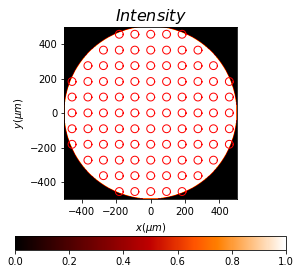

In [9]:
haz_0 = Vector_source_XY(x0, y0, wavelength)
haz_0.constant_wave(u=1,v=haz_0_pypol.M, radius=(500,500), has_normalization=False)
haz_0.draw(kind='ellipses', color_line='r')

In [10]:
pol1=Vector_mask_XY(x0,y0,wavelength)
pol1.apply_polarization(m_pol_1.M)
#pol1.draw()

In [11]:
pol2=Vector_mask_XY(x0,y0,wavelength)
pol2.apply_polarization(m_retarder_1.M)
#pol2.draw('phase')

In [12]:
pol3=Vector_mask_XY(x0,y0,wavelength)
pol3.apply_polarization(m_retarder_2.M)
#pol3.draw('phase')

In [13]:
pol4=Vector_mask_XY(x0,y0,wavelength)
pol4.apply_polarization(m_pol_2.M)
#pol4.draw()

## Definition of sample (not from physical SLM, but simulates)

In [14]:
focal=20*mm
u_mask_fresnel = Scalar_mask_XY(x0, y0, wavelength)
u_mask_fresnel.fresnel_lens(r0=(0,0), radius=(500*um,500*um), 
                            focal=focal)
u_mask_fresnel.draw();

### Polarization of lens zones in pypol

In [15]:

m0=Jones_matrix("m0")
m0.diattenuator_linear(p1=1, p2=0, azimuth=0*degrees)

m45=Jones_matrix("m45")
m45.diattenuator_linear(p1=1, p2=0, azimuth=45*degrees)

mm45=Jones_matrix("m45")
mm45.diattenuator_linear(p1=1, p2=0, azimuth=-45*degrees)

m90=Jones_matrix("m900")
m90.diattenuator_linear(p1=1, p2=0, azimuth=90*degrees)

m_circular_1=Jones_matrix("m0")
m_circular_1.retarder_linear(R=90*degrees, azimuth=0)

m_circular_2=Jones_matrix("m0")
m_circular_2.retarder_linear(R=-90*degrees, azimuth=0)

m0 = 
[+1.000+0.000j +0.000+0.000j ]   
[+0.000+0.000j +0.000+1.000j ]   

### Polarization of lens zones in diffractio

In [16]:
v_m0=Vector_mask_XY(x0,y0,wavelength)
v_m0.apply_polarization(m0.M)

v_m45=Vector_mask_XY(x0,y0,wavelength)
v_m45.apply_polarization(m45.M)

v_mm45=Vector_mask_XY(x0,y0,wavelength)
v_mm45.apply_polarization(mm45.M)


v_m90=Vector_mask_XY(x0,y0,wavelength)
v_m90.apply_polarization(m90.M)

v_m_circular_1=Vector_mask_XY(x0,y0,wavelength)
v_m_circular_1.apply_polarization(m_circular_1.M)

v_m_circular_2=Vector_mask_XY(x0,y0,wavelength)
v_m_circular_2.apply_polarization(m_circular_2.M)

<Figure size 432x288 with 0 Axes>

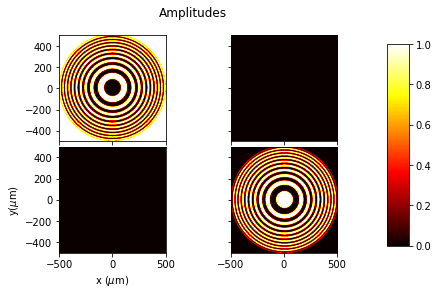

In [17]:
v_mask_fresnel=Vector_mask_XY(x0,y0,wavelength)
v_mask_fresnel.complementary_masks(u_mask_fresnel, #mask_gauss
                                state_0=m0.M,
                                state_1=m90.M,
                                is_binarized=False)

v_mask_fresnel.draw(kind='amplitude');

In [18]:
sample = v_mask_fresnel

## Field after the polarizers (without propagation)

<Figure size 432x288 with 0 Axes>

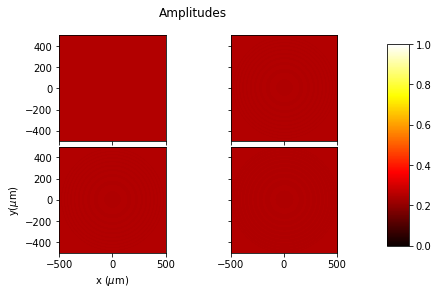

In [19]:
salida_1 =  pol1 * pol2*  sample *  pol3 * pol4
salida_1.draw();

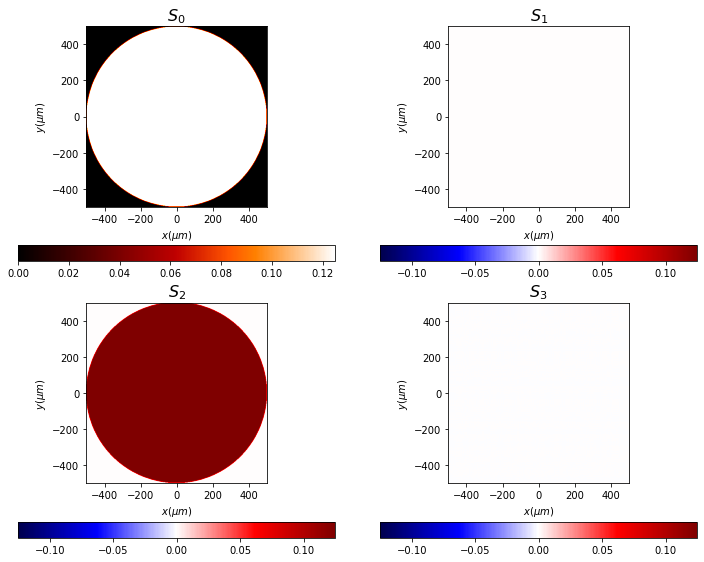

In [20]:
field_0 = haz_0 * pol1 * pol2* sample *  pol3 * pol4

field_0.draw(kind='ellipses', color_line='r',
             num_ellipses=(21,21))
field_0.draw('stokes')

# propagation of field

In [21]:
field_z= field_0.RS(z=focal)

E2=field_z.cut_resample(  x_limits=(-50,50),
                     y_limits=(-50,50),
                     num_points=[],
                     new_field=True,
                     interp_kind=(3, 1))

In [22]:
maximum_intensity=E2.get('intensity').max()
print("maximum intensity: {:2.2f}".format(maximum_intensity))

maximum intensity: 186.60


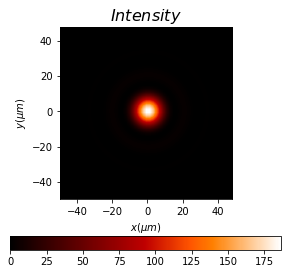

In [23]:
E2.draw('intensity', logarithm=0)

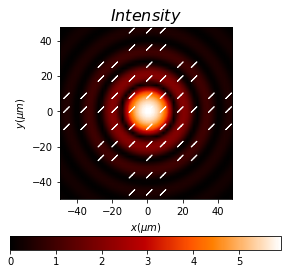

In [24]:
E2.draw('ellipses',logarithm=2, normalize='maximum', num_ellipses=(11,11), draw_arrow=False)

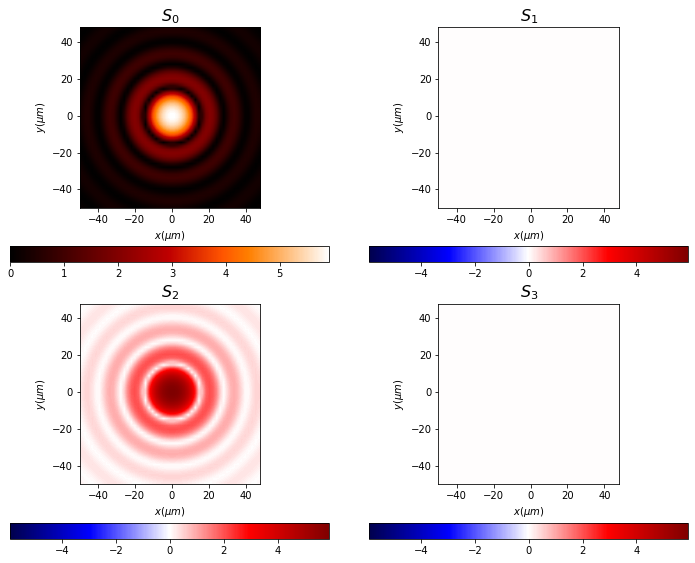

In [25]:
E2.draw('stokes', logarithm=2);

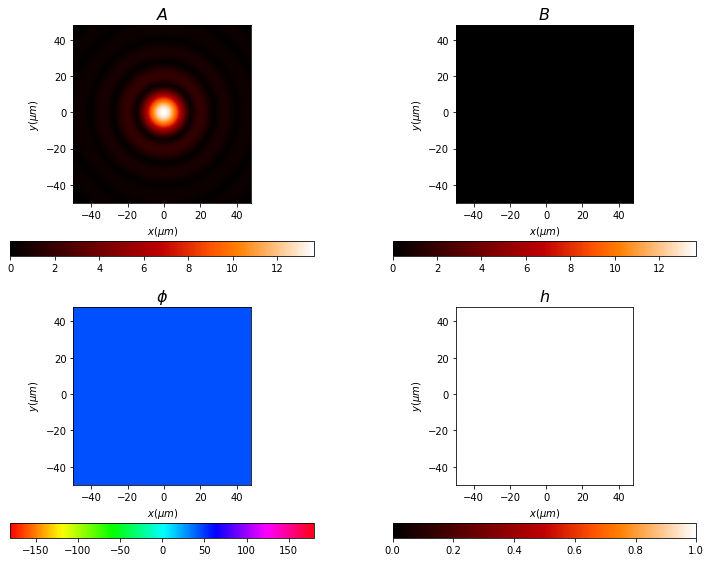

In [26]:
E2.draw('param_ellipse');